In [ ]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import asShape, Point, JOIN_STYLE
from descartes import PolygonPatch
import pandas as pd
import geopandas
import requests
import io
from shapely.geometry.geo import mapping
from tqdm import tqdm
from shapely.ops import cascaded_union

In [ ]:
#Colombia Shape
data = json.load(open("./data/countries.geojson"))
fig = plt.figure(figsize=(8, 10))
plt.axis('off')
ax = fig.gca()
GRID_FACTOR = 100

for feat in data["features"]:
    #if feat['id'] == 'COL' or feat['id'] == 'VEN':
    if feat['id'] == 'COL':
        geom_col = asShape(feat["geometry"])
        min_x = 1000
        max_x = -1000
        min_y = 1000
        max_y = -1000
        for coor in feat["geometry"]['coordinates'][0]:
            min_x = min(min_x,coor[0])
            max_x = max(max_x,coor[0])
            min_y = min(min_y,coor[1])
            max_y = max(max_y,coor[1])
        width = max_x - min_x
        height = max_y - min_y
        num_squares = 0
        set_matrix = np.zeros((GRID_FACTOR + 1, GRID_FACTOR + 1))
        polygons_matrix = []
        centroids_list = []
        for square_number_x in tqdm(range(GRID_FACTOR + 1)):
            polygons_matrix_row = []
            for square_number_y in range(GRID_FACTOR + 1):
                centroid_dict = {}
                centroid_id = [square_number_x, square_number_y]
                centroid_dict["centroid_id"] = centroid_id
                centroid_dict["centroid_id_x"] = square_number_x
                centroid_dict["centroid_id_y"] = square_number_y
                centroid_x = min_x + (square_number_x/GRID_FACTOR)*width
                centroid_y = min_y + (square_number_y/GRID_FACTOR)*height
                ax.plot(centroid_x, centroid_y, '-')
                centroid = Point(centroid_x, centroid_y)
                centroid_dict["centroid_point"] = centroid
                centroid_dict["centroid_class"] = "NA"
                if geom_col.contains(centroid):
                    centroids_list.append(centroid_dict)
                    set_matrix[square_number_x][square_number_y] = 1
                    num_squares = num_squares + 1
                    new_polygon_sw = [centroid_x - width/(GRID_FACTOR*2), centroid_y - height/(GRID_FACTOR*2)]
                    new_polygon_se = [centroid_x + width/(GRID_FACTOR*2), centroid_y - height/(GRID_FACTOR*2)]
                    new_polygon_nw = [centroid_x - width/(GRID_FACTOR*2), centroid_y + height/(GRID_FACTOR*2)]
                    new_polygon_ne = [centroid_x + width/(GRID_FACTOR*2), centroid_y + height/(GRID_FACTOR*2)]
                    new_polygon = {'type': 'Polygon', 'coordinates': [[new_polygon_sw, new_polygon_se, new_polygon_ne, new_polygon_nw]]}
                    ax.add_patch(PolygonPatch(new_polygon, fc='violet', ec='black',
                    alpha=1, lw=1, ls='-', zorder=2))
                    polygons_matrix_row.append(new_polygon)
                else:
                    polygons_matrix_row.append(None)
            polygons_matrix.append(polygons_matrix_row)
print(num_squares)   
ax.clear

100%|██████████| 101/101 [02:40<00:00,  1.59s/it]

3555


<bound method _AxesBase.clear of <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5e60c4e80>>

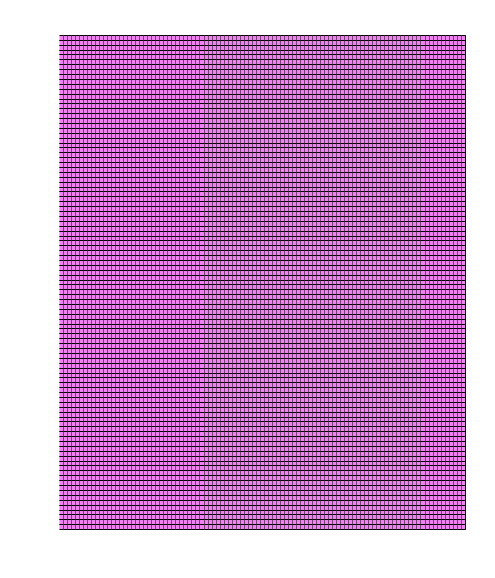

In [2]:
#No Shape
data = json.load(open("./data/countries.geojson"))
fig = plt.figure(figsize=(8, 10))
plt.axis('off')
ax = fig.gca()
GRID_FACTOR = 100

for feat in data["features"]:
    #if feat['id'] == 'COL' or feat['id'] == 'VEN':
    if feat['id'] == 'COL':
        geom_col = asShape(feat["geometry"])
        min_x = 1000
        max_x = -1000
        min_y = 1000
        max_y = -1000
        for coor in feat["geometry"]['coordinates'][0]:
            min_x = min(min_x,coor[0])
            max_x = max(max_x,coor[0])
            min_y = min(min_y,coor[1])
            max_y = max(max_y,coor[1])
        width = max_x - min_x
        height = max_y - min_y
        min_x = min_x - width//6
        #max_x = max_x + width//3
        #min_y = min_y - height//3
        max_y = max_y + height//6
        width = max_x - min_x
        height = max_y - min_y
        num_squares = 0
        set_matrix = np.zeros((GRID_FACTOR + 1, GRID_FACTOR + 1))
        shapes_matrix = []
        polygons_matrix = []
        centroids_list = []
        for square_number_x in tqdm(range(GRID_FACTOR + 1)):
            shapes_matrix_row = []
            polygons_matrix_row = []
            for square_number_y in range(GRID_FACTOR + 1):
                centroid_dict = {}
                centroid_id = [square_number_x, square_number_y]
                centroid_dict["centroid_id"] = centroid_id
                centroid_x = min_x + (square_number_x/GRID_FACTOR)*width
                centroid_y = min_y + (square_number_y/GRID_FACTOR)*height
                ax.plot(centroid_x, centroid_y, '-')
                centroid = Point(centroid_x, centroid_y)
                centroid_dict["centroid_point"] = centroid
                centroid_dict["centroid_id_x"] = square_number_x
                centroid_dict["centroid_id_y"] = square_number_y
                centroid_dict["centroid_class"] = "NA"
                if geom_col.contains(centroid):
                    num_squares = num_squares + 1
                centroids_list.append(centroid_dict)
                set_matrix[square_number_x][square_number_y] = 1
                new_polygon_sw = [centroid_x - width/(GRID_FACTOR*2), centroid_y - height/(GRID_FACTOR*2)]
                new_polygon_se = [centroid_x + width/(GRID_FACTOR*2), centroid_y - height/(GRID_FACTOR*2)]
                new_polygon_nw = [centroid_x - width/(GRID_FACTOR*2), centroid_y + height/(GRID_FACTOR*2)]
                new_polygon_ne = [centroid_x + width/(GRID_FACTOR*2), centroid_y + height/(GRID_FACTOR*2)]
                new_polygon = {'type': 'Polygon', 'coordinates': [[new_polygon_sw, new_polygon_se, new_polygon_ne, new_polygon_nw]]}
                ax.add_patch(PolygonPatch(new_polygon, fc='violet', ec='black',
                alpha=1, lw=1, ls='-', zorder=2))
                polygons_matrix_row.append(new_polygon)
                shapes_matrix_row.append(asShape(new_polygon))
            polygons_matrix.append(polygons_matrix_row)
            shapes_matrix.append(shapes_matrix_row)
print(num_squares)   
ax.clear

In [3]:
centroids_df = pd.DataFrame(centroids_list)
centroids_gdf = geopandas.GeoDataFrame(centroids_df, geometry='centroid_point')

In [4]:
centroids_gdf_bkup = centroids_gdf.copy()

In [5]:
centroids_gdf = centroids_gdf_bkup.copy()

In [6]:
r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1e3PXAVDF_gPTx-_GTHU9hTAClEKJj5Y_D2_YsW6Vd6U&output=csv')
#https://docs.google.com/spreadsheets/d/1e3PXAVDF_gPTx-_GTHU9hTAClEKJj5Y_D2_YsW6Vd6U/edit?usp=sharing
data = r.content
df = pd.read_csv(io.StringIO(data.decode("utf-8")))
df['coords'] = df.apply(lambda x:Point(x['centroide_depto_x'], x['centroide_depto_y']),axis=1)
df = df[list(set(df.columns) - set(['centroide_depto_x']) - set(['centroide_depto_y']))]
df = geopandas.GeoDataFrame(df, geometry='coords')

In [7]:
dict_polygons_merge = {}
for depto in list(df['nombre_depto']):
    dict_polygons_merge[depto] = []

In [8]:
import colorsys

def HSVToRGB(h, s, v):
    (r, g, b) = colorsys.hsv_to_rgb(h, s, v)
    #eturn (int(255*r), int(255*g), int(255*b))
    return (r,g,b)

def getDistinctColors(n):
    huePartition = 1.0 / (n + 1)
    return (HSVToRGB(huePartition * value, 1.0, 1.0) for value in range(0, n))

In [9]:
color_list = list(getDistinctColors(len(df)//2)) + list(getDistinctColors(len(df)//2 + 1))

In [10]:
#df_proc = df.sort_values('pob2015', ascending=False)
df_proc = df.iloc[df['coords'].distance(Point(-74.21445362999999, 4.288578982)).sort_values().index]

In [11]:
EMPTY_FACTOR = 0.5

In [12]:
num_squares * EMPTY_FACTOR/len(df_proc['pob2015'])

53.86363636363637

In [13]:
#df_proc['squares'] = (num_squares * df_proc['pob2015']*EMPTY_FACTOR/df_proc['pob2015'].sum()).astype(int)
#Equal area
df_proc['squares'] = int(num_squares * EMPTY_FACTOR/len(df_proc['pob2015']))
#df_proc['squares'] = 3
df_proc_test = df_proc.iloc[[0]]

/home/jfm/antipodes/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df_proc.sort_values('squares')

,anticorrupcion2018,pob2015,nombre_depto,coords,squares
4,45.74,7980001,BOGOTA,POINT (-74.21445362999999 4.288578982),53
0,18.50,76243,AMAZONAS,POINT (-71.52714116999999 -1.561404722),53
3,23.53,2461001,ATLANTICO,POINT (-74.98257618 10.66431968),53
19,19.51,1259667,MAGDALENA,POINT (-74.28222902 10.22925559),53
15,17.26,41482,GUAINIA,POINT (-68.80034956999999 2.666704368),53
11,22.61,1028880,CESAR,POINT (-73.53815451 9.527763762000001),53
31,16.96,43665,VAUPES,POINT (-70.57439041000001 0.6102477364),53
28,22.38,851526,SUCRE,POINT (-75.12331879999999 9.062540697000001),53
32,14.71,71974,VICHADA,POINT (-69.43305205 4.668980738),53
21,35.79,1744275,NARINO,POINT (-77.88920588000001 1.545652489),53


#No cont
color_dict = {}
for color_index, depto in tqdm(enumerate(df_proc.iterrows()), total=len(df_proc)):
    #print(depto[1])
    coordinates = depto[1]['coords']
    no_squares = depto[1]['squares']
    nombre_depto = depto[1]['nombre_depto']
    #print(type(coordinates))
    color_dict[nombre_depto] = color_list[color_index]
    #for square in tqdm(range(no_squares)):
    for square in range(no_squares):
        centroid_index = centroids_gdf[centroids_gdf['centroid_class'] == 'NA']["centroid_point"].distance(coordinates).sort_values().index[0]
        centroids_gdf.at[centroid_index, 'centroid_class'] = nombre_depto

#Centroid
color_dict = {}
for color_index, depto in tqdm(enumerate(df_proc.iterrows())):
    #print(depto[1])
    coordinates = depto[1]['coords']
    no_squares = depto[1]['squares']
    nombre_depto = depto[1]['nombre_depto']
    #print(type(coordinates))
    color_dict[nombre_depto] = color_list[color_index]
    #for square in tqdm(range(no_squares)):
    centroid_index = centroids_gdf[centroids_gdf['centroid_class'] == 'NA']["centroid_point"].distance(coordinates).sort_values().index[0]
    centroids_gdf.at[centroid_index, 'centroid_class'] = nombre_depto
    for square in range(no_squares):
        mean_x = centroids_gdf[centroids_gdf['centroid_class'] == nombre_depto]["centroid_point"].apply(lambda x:x.centroid.x).mean()
        mean_y = centroids_gdf[centroids_gdf['centroid_class'] == nombre_depto]["centroid_point"].apply(lambda x:x.centroid.y).mean()
        new_center = Point(mean_x, mean_y)
        centroid_index = centroids_gdf[centroids_gdf['centroid_class'] == 'NA']["centroid_point"].distance(new_center).sort_values().index[0]
        centroids_gdf.at[centroid_index, 'centroid_class'] = nombre_depto

#Cont
color_dict = {}
for color_index, depto in tqdm(enumerate(df_proc.iterrows()), total=len(df_proc)):
    #print(depto[1])
    coordinates = depto[1]['coords']
    no_squares = depto[1]['squares']
    nombre_depto = depto[1]['nombre_depto']
    #print(type(coordinates))
    color_dict[nombre_depto] = color_list[color_index]
    #for square in tqdm(range(no_squares)):
    centroid_index = centroids_gdf[(centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_')]["centroid_point"].distance(coordinates).sort_values().index[0]
    centroids_gdf.at[centroid_index, 'centroid_class'] = nombre_depto
    centroid_id = centroids_gdf.at[centroid_index, 'centroid_id']
    centroid_id_x = centroid_id[0]
    centroid_id_y = centroid_id[1]
    potential_up = centroid_id_y < GRID_FACTOR + 1
    potential_down = centroid_id_y > 0
    potential_left = centroid_id_x > 0
    potential_right = centroid_id_x < GRID_FACTOR + 1
    if potential_up:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
    if potential_down:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
    if potential_left:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
    if potential_right:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        
    for square in range(no_squares):
        centroid_index = centroids_gdf[centroids_gdf['centroid_class'] == "pot_%s" % nombre_depto]["centroid_point"].distance(coordinates).sort_values().index[0]
        centroids_gdf.at[centroid_index, 'centroid_class'] = nombre_depto
        centroid_id = centroids_gdf.at[centroid_index, 'centroid_id']
        centroid_id_x = centroid_id[0]
        centroid_id_y = centroid_id[1]
        potential_up = centroid_id_y < GRID_FACTOR + 1
        potential_down = centroid_id_y > 0
        potential_left = centroid_id_x > 0
        potential_right = centroid_id_x < GRID_FACTOR + 1
        if potential_up:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        if potential_down:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        if potential_left:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        if potential_right:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto

In [15]:
#Cont
color_dict = {}
for color_index, depto in tqdm(enumerate(df_proc.iterrows()), total=len(df_proc)):
    #print(depto[1])
    coordinates = depto[1]['coords']
    no_squares = depto[1]['squares']
    nombre_depto = depto[1]['nombre_depto']
    #print(type(coordinates))
    color_dict[nombre_depto] = color_list[color_index]
    #for square in tqdm(range(no_squares)):
    centroid_index = centroids_gdf[(centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_')]["centroid_point"].distance(coordinates).sort_values().index[0]
    centroids_gdf.at[centroid_index, 'centroid_class'] = nombre_depto
    centroid_id = centroids_gdf.at[centroid_index, 'centroid_id']
    centroid_id_x = centroid_id[0]
    centroid_id_y = centroid_id[1]
    potential_up = centroid_id_y < GRID_FACTOR + 1
    potential_down = centroid_id_y > 0
    potential_left = centroid_id_x > 0
    potential_right = centroid_id_x < GRID_FACTOR + 1
    if potential_up:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
    if potential_down:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
    if potential_left:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
    if potential_right:
        if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
            centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
            centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        
    for square in range(no_squares):
        mean_x = centroids_gdf[centroids_gdf['centroid_class'] == nombre_depto]["centroid_point"].apply(lambda x:x.centroid.x).mean()
        mean_y = centroids_gdf[centroids_gdf['centroid_class'] == nombre_depto]["centroid_point"].apply(lambda x:x.centroid.y).mean()
        new_center = Point((mean_x*3 + coordinates.centroid.x*0)/3,(mean_y*3 + coordinates.centroid.y*0)/3)
        centroid_index = centroids_gdf[centroids_gdf['centroid_class'] == "pot_%s" % nombre_depto]["centroid_point"].distance(new_center).sort_values().index[0]
        centroids_gdf.at[centroid_index, 'centroid_class'] = nombre_depto
        centroid_id = centroids_gdf.at[centroid_index, 'centroid_id']
        centroid_id_x = centroid_id[0]
        centroid_id_y = centroid_id[1]
        potential_up = centroid_id_y < GRID_FACTOR + 1
        potential_down = centroid_id_y > 0
        potential_left = centroid_id_x > 0
        potential_right = centroid_id_x < GRID_FACTOR + 1
        if potential_up:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y+1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        if potential_down:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == centroid_id_x) & (centroids_gdf['centroid_id_y'] == (centroid_id_y-1)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        if potential_left:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x - 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto
        if potential_right:
            if len(centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == centroid_id_y) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))]) != 0:
                centroid_index = centroids_gdf[(centroids_gdf['centroid_id_x'] == (centroid_id_x + 1)) & (centroids_gdf['centroid_id_y'] == (centroid_id_y)) & ((centroids_gdf['centroid_class'] == 'NA') | centroids_gdf['centroid_class'].str.startswith('pot_'))].index[0]
                centroids_gdf.at[centroid_index, 'centroid_class'] = "pot_%s" % nombre_depto

100%|██████████| 33/33 [01:03<00:00,  1.93s/it]


In [16]:
centroids_gdf['centroid_class'].unique()

array(['NA', 'pot_SANDRES', 'SANDRES', 'pot_NARINO', 'NARINO',
       'pot_CAUCA', 'CAUCA', 'pot_CHOCO', 'CHOCO', 'pot_VALLE',
       'pot_RISARALDA', 'VALLE', 'RISARALDA', 'pot_PUTUMAYO', 'PUTUMAYO',
       'pot_ANTIOQUIA', 'ANTIOQUIA', 'pot_CORDOBA', 'HUILA', 'QUINDIO',
       'CORDOBA', 'pot_HUILA', 'TOLIMA', 'pot_ATLANTICO', 'ATLANTICO',
       'pot_SUCRE', 'pot_TOLIMA', 'CALDAS', 'SUCRE', 'pot_CALDAS',
       'pot_BOLIVAR', 'BOLIVAR', 'BOGOTA', 'CUNDINAMARCA', 'MAGDALENA',
       'pot_BOGOTA', 'pot_SANTANDER', 'pot_MAGDALENA', 'pot_CAQUETA',
       'SANTANDER', 'CAQUETA', 'pot_CESAR', 'CESAR', 'pot_CUNDINAMARCA',
       'pot_META', 'pot_BOYACA', 'META', 'BOYACA', 'pot_NSANTANDER',
       'NSANTANDER', 'pot_GUAJIRA', 'GUAJIRA', 'pot_GUAVIARE', 'GUAVIARE',
       'pot_CASANARE', 'CASANARE', 'pot_AMAZONAS', 'AMAZONAS',
       'pot_ARAUCA', 'pot_VAUPES', 'ARAUCA', 'VAUPES', 'pot_VICHADA',
       'VICHADA', 'pot_GUAINIA', 'GUAINIA'], dtype=object)

100%|██████████| 10201/10201 [02:34<00:00, 66.10it/s]


<bound method _AxesBase.clear of <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5e5f04400>>

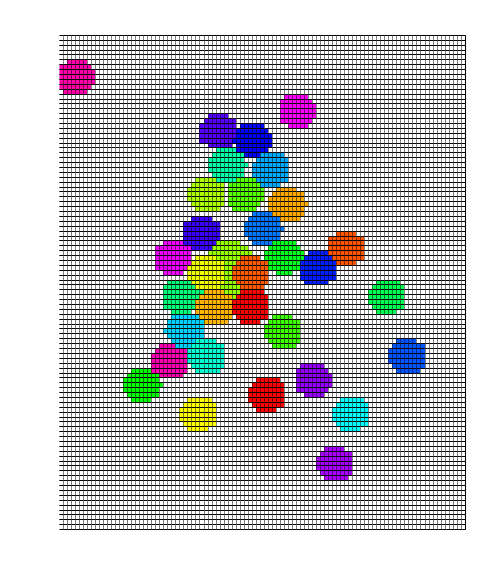

In [17]:
fig = plt.figure(figsize=(8, 10))
plt.axis('off')
ax = fig.gca()
for centroid in tqdm(centroids_gdf.iterrows(), total=len(centroids_gdf)):
    #print(centroid)
    centroid_id = centroid[1]['centroid_id']
    centroid_class = centroid[1]['centroid_class']
    centroid_point = centroid[1]['centroid_point']
    polygon = polygons_matrix[centroid_id[0]][centroid_id[1]]
    raw_shape = shapes_matrix[centroid_id[0]][centroid_id[1]]
    ax.plot(centroid_point.centroid.x, centroid_point.centroid.y, '-')
    if centroid_class == 'NA' or centroid_class.startswith('pot_'):
        pol_color = 'white'
    else:
        pol_color = color_dict[centroid_class]
        dict_polygons_merge[centroid_class].append(raw_shape)
    ax.add_patch(PolygonPatch(polygon, fc=pol_color, ec='black',alpha=1, lw=1, ls='-', zorder=2))
ax.clear

In [18]:
def_pol = {}
for pol_list in dict_polygons_merge:
    eps = 0.0001
    shape = cascaded_union(dict_polygons_merge[pol_list])
    shape = shape.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.mitre)
    def_pol[pol_list] = shape

In [19]:
def_pol

{'AMAZONAS': <shapely.geometry.polygon.Polygon at 0x7fe5c8a67518>,
 'ANTIOQUIA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a67630>,
 'ARAUCA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a673c8>,
 'ATLANTICO': <shapely.geometry.polygon.Polygon at 0x7fe5c8a43ba8>,
 'BOGOTA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a56198>,
 'BOLIVAR': <shapely.geometry.polygon.Polygon at 0x7fe5c8a56358>,
 'BOYACA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5da58>,
 'CALDAS': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5ddd8>,
 'CAQUETA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5dd30>,
 'CASANARE': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5dda0>,
 'CAUCA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5d400>,
 'CESAR': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5d198>,
 'CHOCO': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5d9b0>,
 'CORDOBA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5d7b8>,
 'CUNDINAMARCA': <shapely.geometry.polygon.Polygon at 0x7fe5c8a5deb8>,
 'GUAINIA

In [20]:
d_names = {
    "AMAZONAS":"Amazonas",
    "ANTIOQUIA":"Antioquia",
    "ARAUCA":"Arauca",
    "ATLANTICO":"Atlántico",
    "BOGOTA":"Bogotá",
    "BOLIVAR":"Bolívar",
    "BOYACA":"Boyacá",
    "CALDAS":"Caldas",
    "CAQUETA":"Caquetá",
    "CASANARE":"Casanare",
    "CAUCA":"Cauca",
    "CESAR":"Cesar",
    "CHOCO":"Chocó",
    "CORDOBA":"Córdoba",
    "CUNDINAMARCA":"C/marca",
    "GUAINIA":"Guainía",
    "GUAJIRA":"Guajira",
    "GUAVIARE":"Guaviare",
    "HUILA":"Huila",
    "MAGDALENA":"Magdalena",
    "META":"Meta",
    "NARINO":"Nariño",
    "NSANTANDER":"N. Santander",
    "PUTUMAYO":"Putumayo",
    "QUINDIO":"Quindío",
    "RISARALDA":"Risaralda",
    "SANDRES":"San Andrés",
    "SANTANDER":"Santander",
    "SUCRE":"Sucre",
    "TOLIMA":"Tolima",
    "VALLE":"Valle",
    "VAUPES":"Vaupés",
    "VICHADA":"Vichada"
}

In [21]:
def deep_list(x):
    if not ( type(x) == type( () ) or type(x) == type( [] ) ):
        return x
    return list(map(deep_list,x))

AMAZONAS
ANTIOQUIA
ARAUCA
ATLANTICO
BOGOTA
BOLIVAR
BOYACA
CALDAS
CAQUETA
CASANARE
CAUCA
CESAR
CHOCO
CORDOBA
CUNDINAMARCA
GUAINIA
GUAJIRA
GUAVIARE
HUILA
MAGDALENA
META
NARINO
NSANTANDER
PUTUMAYO
QUINDIO
RISARALDA
SANDRES
SANTANDER
SUCRE
TOLIMA
VALLE
VAUPES
VICHADA


<bound method _AxesBase.clear of <matplotlib.axes._subplots.AxesSubplot object at 0x7fe5c8358390>>

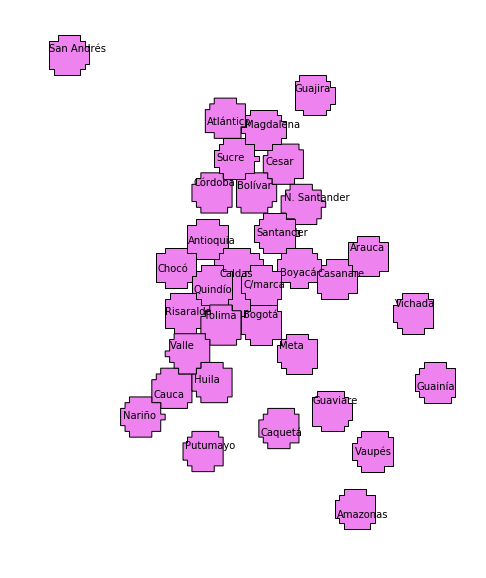

In [22]:
fig = plt.figure(figsize=(8, 10))
plt.axis('off')
ax = fig.gca()
geojson_python = []
for pol_shape in def_pol:
    print(pol_shape)
    temp_shape = def_pol[pol_shape]
    new_geometry = mapping(temp_shape)
    x, y = temp_shape.centroid.x, temp_shape.centroid.y
    ax.plot(x, y, '-')
    ax.text(x-0.6, y + (np.random.rand() - 0.55)*0.55, d_names[pol_shape], fontsize=10)
    ax.add_patch(PolygonPatch(new_geometry, fc='violet', ec='black',
                alpha=1, lw=1, ls='-', zorder=2))
    new_geometry['coordinates'] = deep_list(new_geometry['coordinates'])
    ret_dict = {"type": "Feature", "properties": {"DPTO": pol_shape}, "geometry":new_geometry}
    geojson_python.append(ret_dict)
ax.clear

In [23]:
geojson_python    

[{'type': 'Feature',
  'properties': {'DPTO': 'AMAZONAS'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-72.02815828499996, -1.5815409499999697],
     [-71.88701219499998, -1.5815409500000552],
     [-71.88701219500004, -1.3941860499999967],
     [-71.74586610499999, -1.3941860499999628],
     [-71.745866105, -1.2068311500000826],
     [-71.04013565499997, -1.206831149999982],
     [-71.04013565499997, -1.3941860499999947],
     [-70.75784347500002, -1.3941860500000363],
     [-70.75784347500002, -1.7687958499999028],
     [-70.757843475, -2.3309605500000266],
     [-70.89898956499987, -2.3309605500001216],
     [-70.89898956499995, -2.5183154499999074],
     [-71.74586610499992, -2.5183154499999074],
     [-71.7458661049999, -2.3309605499999657],
     [-71.88701219500001, -2.3309605499999932],
     [-71.88701219500007, -2.143605649999875],
     [-72.02815828499996, -2.1436056500000933],
     [-72.02815828499996, -1.5815409499999697]]]}},
 {'type': 'Feature',
  'properties': 

In [24]:
final_dict = {"type": "FeatureCollection", "features":geojson_python}

In [25]:
final_dict

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'DPTO': 'AMAZONAS'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-72.02815828499996, -1.5815409499999697],
      [-71.88701219499998, -1.5815409500000552],
      [-71.88701219500004, -1.3941860499999967],
      [-71.74586610499999, -1.3941860499999628],
      [-71.745866105, -1.2068311500000826],
      [-71.04013565499997, -1.206831149999982],
      [-71.04013565499997, -1.3941860499999947],
      [-70.75784347500002, -1.3941860500000363],
      [-70.75784347500002, -1.7687958499999028],
      [-70.757843475, -2.3309605500000266],
      [-70.89898956499987, -2.3309605500001216],
      [-70.89898956499995, -2.5183154499999074],
      [-71.74586610499992, -2.5183154499999074],
      [-71.7458661049999, -2.3309605499999657],
      [-71.88701219500001, -2.3309605499999932],
      [-71.88701219500007, -2.143605649999875],
      [-72.02815828499996, -2.1436056500000933],
      [-72.02815828499996, 

In [26]:
with open('colombia_deptos_equal_map.json', 'w') as fp:
    json.dump(final_dict, fp)